# Credit Risk Evaluation and Borrower Analysis


In [5]:
# Import Necessary libraries
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

# Set consistent style
plt.style.use("seaborn-v0_8-whitegrid") 

In [2]:
data = pd.read_csv("credit_scoring.csv")
print(data.head())

   Age  Gender Marital Status Education Level Employment Status  \
0   60    Male        Married          Master          Employed   
1   25    Male        Married     High School        Unemployed   
2   30  Female         Single          Master          Employed   
3   58  Female        Married             PhD        Unemployed   
4   32    Male        Married        Bachelor     Self-Employed   

   Credit Utilization Ratio  Payment History  Number of Credit Accounts  \
0                      0.22           2685.0                          2   
1                      0.20           2371.0                          9   
2                      0.22           2771.0                          6   
3                      0.12           1371.0                          2   
4                      0.99            828.0                          2   

   Loan Amount  Interest Rate  Loan Term   Type of Loan  
0      4675000           2.65         48  Personal Loan  
1      3619000           5.19 

Below is the description of all features in the data:

1. Age: This featurer represents the age of the individual.

2. Gender: This feature captures the gender of the individual.

3. Marital Status: This feature denotes the marital status of the individual.
4. Education Level: This feature represents the highest level of education attained by the individual.
5. Employment Status: This feature indicates the current employment status of the individual.
6. Credit Utilization Ratio: This feature reflects the ratio of credit used by the individual compared to their total available credit limit.
7. Payment History: It represents the monthly net payment behaviour of each customer, taking into account factors such as on-time payments, late payments, missed payments, and defaults.
8. Number of Credit Accounts: It represents the count of active credit accounts the person holds.
9. Loan Amount: It indicates the monetary value of the loan.
10. Interest Rate: This feature represents the interest rate associated with the loan.
11. Loan Term: This feature denotes the duration or term of the loan.
12. Type of Loan: It includes categories like “Personal Loan,” “Auto Loan,” or potentially other types of loans.

In [ ]:
# Data information 
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   Gender                     1000 non-null   object 
 2   Marital Status             1000 non-null   object 
 3   Education Level            1000 non-null   object 
 4   Employment Status          1000 non-null   object 
 5   Credit Utilization Ratio   1000 non-null   float64
 6   Payment History            1000 non-null   float64
 7   Number of Credit Accounts  1000 non-null   int64  
 8   Loan Amount                1000 non-null   int64  
 9   Interest Rate              1000 non-null   float64
 10  Loan Term                  1000 non-null   int64  
 11  Type of Loan               1000 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB
None


In [ ]:
# Summary statistics of the dataset.
print(data.describe())

               Age  Credit Utilization Ratio  Payment History  \
count  1000.000000               1000.000000      1000.000000   
mean     42.702000                  0.509950      1452.814000   
std      13.266771                  0.291057       827.934146   
min      20.000000                  0.000000         0.000000   
25%      31.000000                  0.250000       763.750000   
50%      42.000000                  0.530000      1428.000000   
75%      54.000000                  0.750000      2142.000000   
max      65.000000                  1.000000      2857.000000   

       Number of Credit Accounts   Loan Amount  Interest Rate    Loan Term  
count                1000.000000  1.000000e+03    1000.000000  1000.000000  
mean                    5.580000  2.471401e+06      10.686600    37.128000  
std                     2.933634  1.387047e+06       5.479058    17.436274  
min                     1.000000  1.080000e+05       1.010000    12.000000  
25%                     3.000

### Credit Utilization Ratio

The distribution of the **Credit Utilization Ratio** provides insight into how borrowers use their available credit limits relative to their total credit capacity.



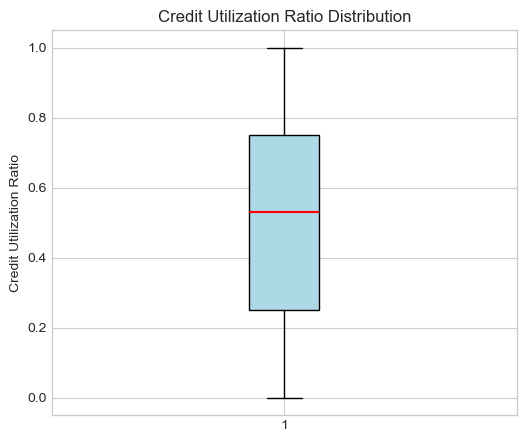

In [6]:
plt.figure(figsize=(6,5))
plt.boxplot(data['Credit Utilization Ratio'], patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'),
            medianprops=dict(color='red', linewidth=1.5))
plt.title('Credit Utilization Ratio Distribution')
plt.ylabel('Credit Utilization Ratio')
plt.show()


The box plot shows how borrowers vary in their credit utilization. Most values are concentrated within a moderate range, suggesting balanced credit usage across the sample. A few higher values indicate individuals who utilize a larger proportion of their available credit, which may reflect higher credit dependency or potential financial stress. Extremely low utilization values, on the other hand, can indicate conservative credit behavior or limited access to credit facilities.


### Loan Amount Distribution

The distribution of **Loan Amounts** reveals how borrowing levels vary among individuals in the dataset.


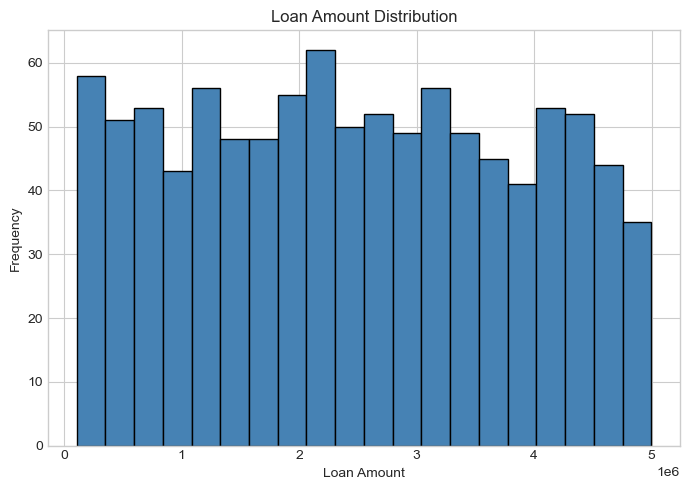

In [7]:
plt.figure(figsize=(7,5))
plt.hist(data['Loan Amount'], bins=20, color='steelblue', edgecolor='black')
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


The histogram shows a broad spread of loan amounts with a noticeable concentration around mid-range values.  
Higher frequency in moderate loan amounts suggests that most borrowers take average-sized loans, possibly reflecting standard lending limits for common loan types.  
The tail extending toward higher values represents a smaller segment of borrowers with larger credit exposure, which may correspond to higher-income individuals or business-related loans.


### Correlation Heatmap

Examining the correlation between numerical variables highlights the relationships among credit behavior, loan characteristics, and borrower profiles.


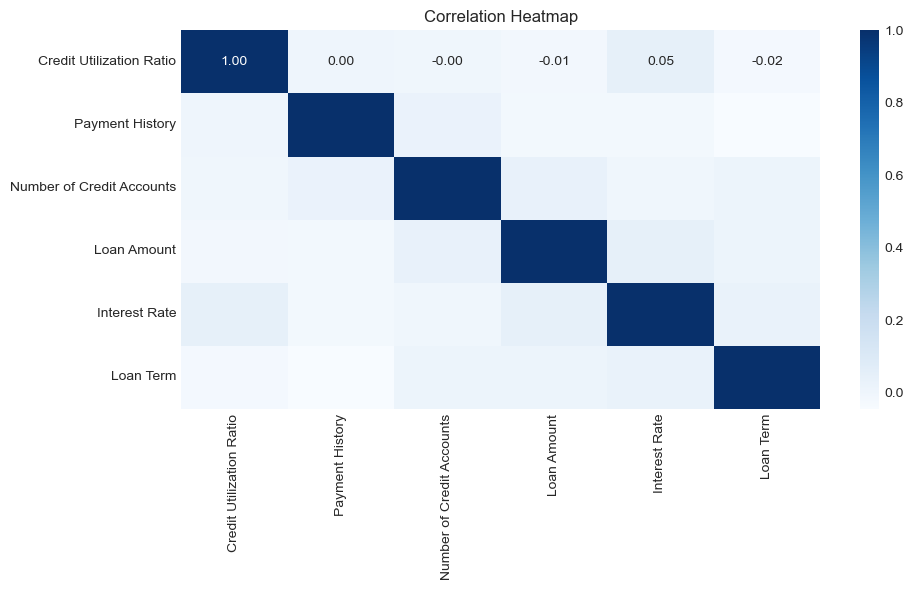

In [8]:
numeric_df = data[['Credit Utilization Ratio', 
                   'Payment History', 
                   'Number of Credit Accounts', 
                   'Loan Amount', 
                   'Interest Rate', 
                   'Loan Term']]

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


The heatmap reveals moderate to strong relationships among several financial indicators.  
Positive correlations between **Loan Amount** and **Loan Term** indicate that larger loans are often associated with longer repayment durations.  
The **Credit Utilization Ratio** and **Payment History** show limited correlation, suggesting that past payment performance and current credit usage capture distinct aspects of borrower behavior.  
Understanding these relationships is essential for feature selection and improving the interpretability of the credit scoring model.
